In [ ]:
from google.colab import drive
drive.mount('/content/drive')

: 

In [ ]:
import os

folder_path = '/content/drive/MyDrive/finalmodeldataset'

if os.path.exists(folder_path):
  print(f"Folder '{folder_path}' exists.")
else:
  print(f"Folder '{folder_path}' does not exist.")

Folder '/content/drive/MyDrive/finalmodeldataset' exists.


Random Training Images:


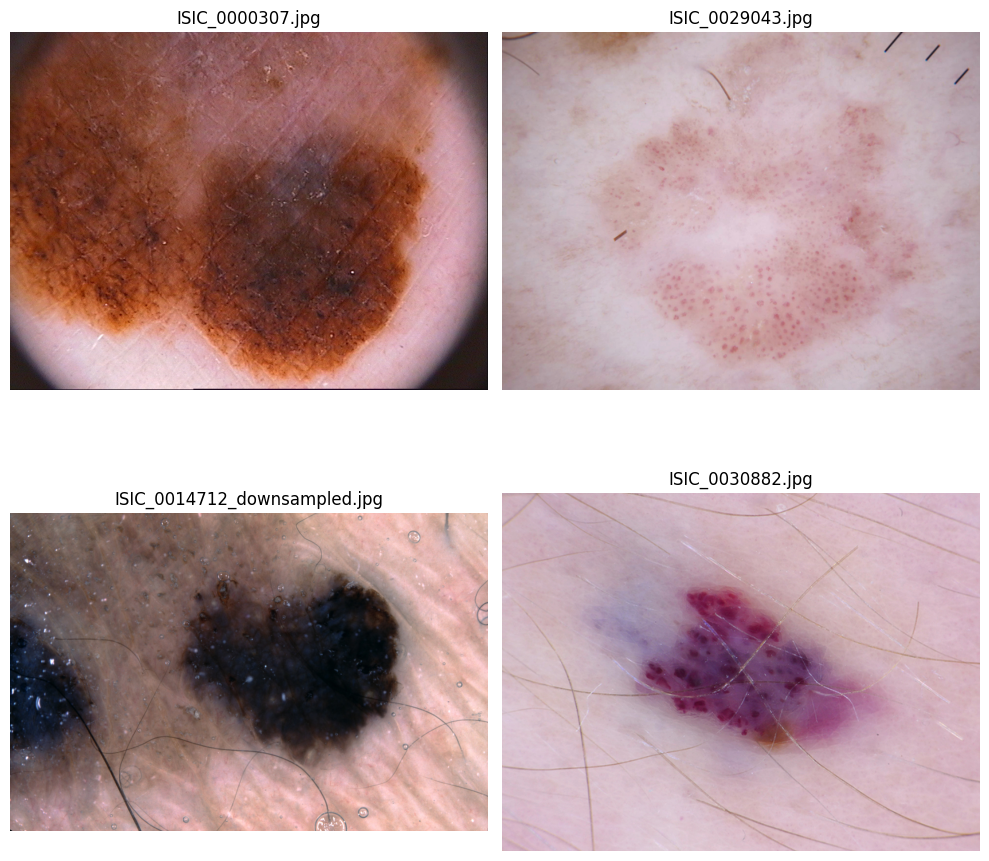

Random val Images:


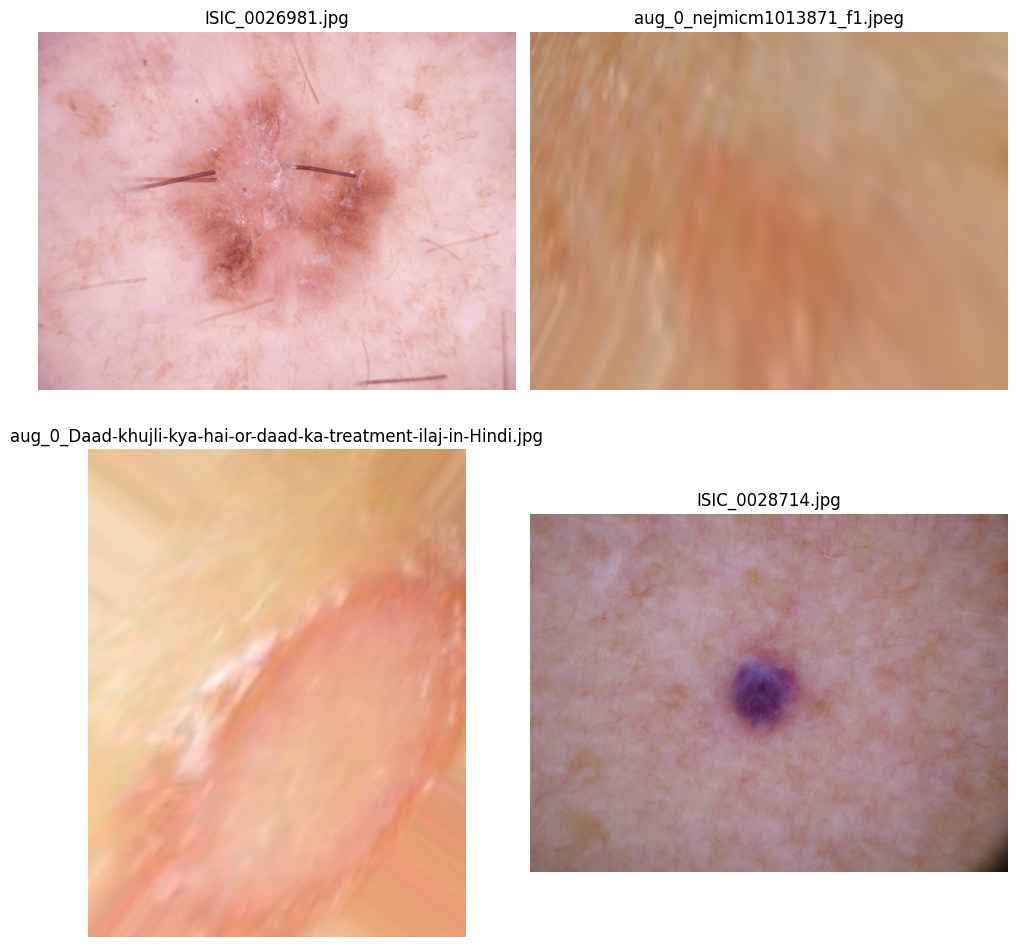

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to the training and testing directories
train_dir = '/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train'
val_dir = '/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/val'

def get_random_images(folder, num_images=4):
    all_images = []
    # Get a list of subfolders (classes)
    class_folders = [os.path.join(folder, subdir) for subdir in os.listdir(folder) if os.path.isdir(os.path.join(folder, subdir))]

    # Iterate over class folders and get image paths
    for class_folder in class_folders:
        images = [os.path.join(class_folder, img) for img in os.listdir(class_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]
        all_images.extend(images)

    # Randomly select images
    random_images = random.sample(all_images, num_images)
    return random_images

def display_images(image_paths):
    plt.figure(figsize=(10, 10))

    for i, img_path in enumerate(image_paths, start=1):
        img = mpimg.imread(img_path)
        plt.subplot(2, 2, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(img_path))

    plt.tight_layout()
    plt.show()

# Get random images from train and test directories
train_images = get_random_images(train_dir, 4)
test_images = get_random_images(val_dir, 4)

print("Random Training Images:")
display_images(train_images)

print("Random val Images:")
display_images(test_images)


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/Untitled1.ipynb
/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train/Actinic keratosis/ISIC_0031108.jpg
/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train/Actinic keratosis/ISIC_0030877.jpg
/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train/Actinic keratosis/ISIC_0032135.jpg
/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train/Actinic keratosis/ISIC_0031228.jpg
/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train/Actinic keratosis/ISIC_0031040.jpg
/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train/Actinic keratosis/ISIC_0031430.jpg
/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train/Actinic keratosis/ISIC_0031922.jpg
/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train/Actinic keratosis/ISIC_0031292.jpg
/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train/Actinic keratosis/ISIC_0030655.jpg
/content/drive/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training and validation data generators
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Check if data is loaded correctly
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")

Found 640 images belonging to 9 classes.
Found 184 images belonging to 9 classes.
Training samples: 640
Validation samples: 184


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Image data generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'

)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train',  # Path to training dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/val',  # Path to validation dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")

# Build a CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Helps to prevent overfitting
    Dense(9, activation='softmax')  # 9 output classes for your 9 skin diseases
])

# Model summary
model.summary()

Found 640 images belonging to 9 classes.
Found 184 images belonging to 9 classes.
Training samples: 640
Validation samples: 184


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      44,302,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,675,721 (170.42 MB)

 Trainable params: 44,675,721 (170.42 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
batch_size = 32
steps_per_epoch = train_generator.samples // batch_size
validation_steps = val_generator.samples // batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
     epochs=25,

)


Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 268s 13s/step - accuracy: 0.4566 - loss: 1.4975 - val_accuracy: 0.4437 - val_loss: 1.3529
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 1.4243
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 265s 13s/step - accuracy: 0.5539 - loss: 1.1958 - val_accuracy: 0.4625 - val_loss: 1.4408
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5417 - val_loss: 1.2928
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 261s 13s/step - accuracy: 0.5716 - loss: 1.1567 - val_accuracy: 0.5000 - val_loss: 1.2628
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 1.0012
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 261s 13s/step - accuracy: 0.5621 - loss: 1.1971 - val_accuracy: 0.4625 - val_loss: 1.3382
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.0000e+00 - loss: 0

In [20]:
validation_steps = val_generator.samples // val_generator.batch_size

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator, steps=validation_steps)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.4705 - loss: 1.3396
Validation Loss: 1.3163
Validation Accuracy: 0.4688


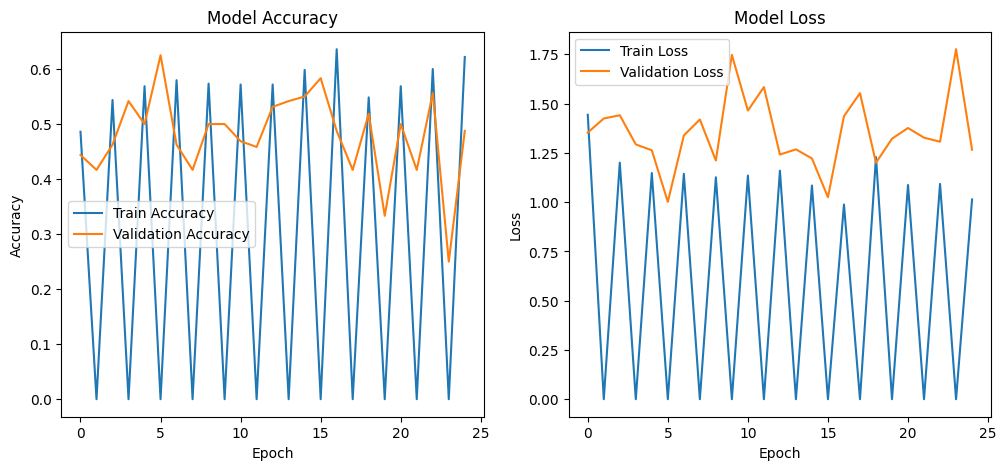

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [22]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator, steps=validation_steps)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5083 - loss: 1.1613
Validation Loss: 1.2473762035369873
Validation Accuracy: 49.38%


5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step


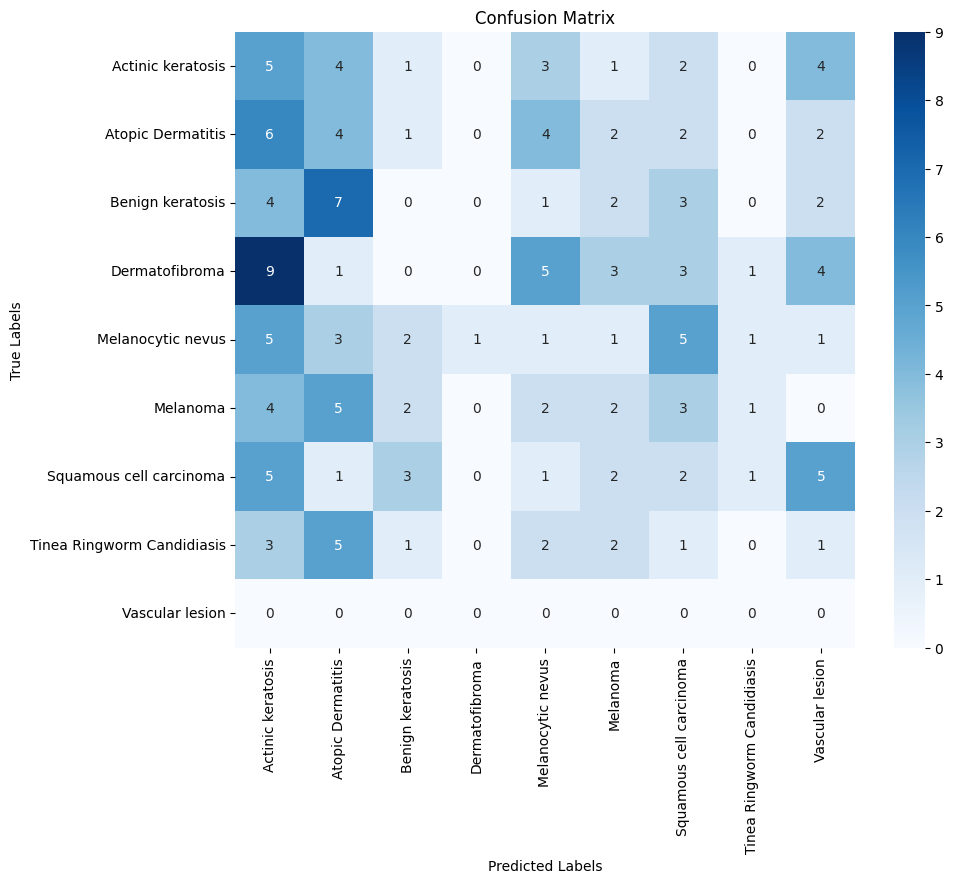

                            precision    recall  f1-score   support

         Actinic keratosis       0.12      0.25      0.16        20
         Atopic Dermatitis       0.13      0.19      0.16        21
          Benign keratosis       0.00      0.00      0.00        19
            Dermatofibroma       0.00      0.00      0.00        26
         Melanocytic nevus       0.05      0.05      0.05        20
                  Melanoma       0.13      0.11      0.12        19
   Squamous cell carcinoma       0.10      0.10      0.10        20
Tinea Ringworm Candidiasis       0.00      0.00      0.00        15
           Vascular lesion       0.00      0.00      0.00         0

                  accuracy                           0.09       160
                 macro avg       0.06      0.08      0.07       160
              weighted avg       0.07      0.09      0.07       160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the validation set
val_preds = model.predict(val_generator, steps=validation_steps)
val_preds_labels = np.argmax(val_preds, axis=1)  # Convert predictions to class labels
true_labels = val_generator.classes[:len(val_preds_labels)]  # Get true labels from the validation generator

#  confusion matrix
conf_matrix = confusion_matrix(true_labels, val_preds_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Get unique labels from both true and predicted labels
unique_labels = np.unique(np.concatenate([true_labels, val_preds_labels]))

# Filter target names to match the unique labels present
target_names = [k for k, v in val_generator.class_indices.items() if v in unique_labels]

# Print classification report for additional metrics
print(classification_report(true_labels, val_preds_labels, target_names=target_names))

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Define the path to the test image
test_image_path = '/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/train/Atopic Dermatitis/1_17.jpg'

# Load and preprocess the test image
try:
    # Load image and ensure it is in RGB format
    test_image = Image.open(test_image_path).convert('RGB')
    test_image_array = np.array(test_image)
    print("Original image shape:", test_image_array.shape)

    target_size = (224, 224) 
    resized_test_image = tf.image.resize(test_image_array, target_size)
    print("Resized image shape:", resized_test_image.shape)

    preprocessed_test_image = resized_test_image / 255.0
    input_image = np.expand_dims(preprocessed_test_image, axis=0)
    print("Input image shape for prediction:", input_image.shape)

except Exception as e:
    print("Error in loading or preprocessing image:", e)

# Model prediction
try:
    # Check the model’s input shape
    model_input_shape = model.input_shape
    print("Model's expected input shape:", model_input_shape)

    if input_image.shape[1:] != model_input_shape[1:]:
        raise ValueError(f"Input image shape {input_image.shape[1:]} does not match model's expected input shape {model_input_shape[1:]}.")

    # Make a prediction
    prediction = model.predict(input_image)
    predicted_class_index = np.argmax(prediction)

    class_names = [
        'Actinic keratosis', 'Atopic Dermatitis', 'Benign keratosis', 'Dermatofibroma',
        'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma',
        'Tinea Ringworm Candidiasis', 'Vascular lesion'
    ]

    # Get the class label
    predicted_class_label = class_names[predicted_class_index]


    if predicted_class_label == "Melanoma":
        description = (
            "Melanoma detected. Urgent intervention is recommended. "
            "Consider excisional biopsy with histopathological evaluation. "
            "If confirmed, discuss staging procedures and potential sentinel lymph node biopsy. "
            "Further treatment may include surgical excision with clear margins, and possibly immunotherapy for advanced cases."
        )
    elif predicted_class_label == "Benign keratosis":
        description = (
            "Benign keratosis detected. Generally non-malignant and often managed conservatively. "
            "If symptomatic or cosmetically concerning, consider cryotherapy, curettage, or laser ablation. "
            "Regular monitoring is recommended to observe for any atypical changes."
        )
    elif predicted_class_label == "Actinic keratosis":
        description = (
            "Actinic keratosis detected. Consider early intervention due to risk of progression to squamous cell carcinoma. "
            "Cryotherapy, topical 5-fluorouracil, or imiquimod cream may be effective. "
            "Alternatively, photodynamic therapy (PDT) can be considered for widespread lesions."
        )
    elif predicted_class_label == "Atopic Dermatitis":
        description = (
            "Atopic dermatitis detected. Recommend a regimen of emollients to restore skin barrier, along with topical corticosteroids "
            "for acute flare-ups. Calcineurin inhibitors (e.g., tacrolimus) may be used for sensitive areas. "
            "Consider discussing lifestyle modifications and potential allergen identification with the patient."
        )
    elif predicted_class_label == "Dermatofibroma":
        description = (
            "Dermatofibroma detected. This is generally benign and often requires no treatment. "
            "If removal is requested for cosmetic reasons or if symptomatic, excisional biopsy is an option. "
            "Advise monitoring for any changes in color, size, or shape that may indicate atypical behavior."
        )
    elif predicted_class_label == "Melanocytic nevus":
        description = (
            "Melanocytic nevus detected."
            "If suspicious, consider excisional biopsy with histopathological analysis. "
            "Advise patient to monitor for hair changes, size, pigmentation, Pain, itchiness, or burning of the mole,"
            "Red or irritated skin around the mole , Blood or pus coming from the mole and the patient should do a follow up regularly"
        )
    elif predicted_class_label == "Squamous cell carcinoma":
        description = (
            "Squamous cell carcinoma detected. Prompt surgical excision with clear margins is recommended. "
            "Consider Mohs micrographic surgery for lesions on the face or areas where tissue preservation is critical. "
            "For high-risk or advanced cases, radiation therapy may be appropriate."
        )
    elif predicted_class_label == "Tinea Ringworm Candidiasis":
        description = (
            "Fungal infection (Tinea or Candidiasis) detected. Topical antifungals (e.g., clotrimazole, terbinafine) are first-line treatments. "
            "For extensive or resistant cases, oral antifungals (e.g., fluconazole, itraconazole) may be required. "
            "Educate the patient on hygiene practices to prevent recurrence and spread."
        )
    elif predicted_class_label == "Vascular lesion":
        description = (
            "Vascular lesion detected. Typically benign; if symptomatic or cosmetically concerning, consider options such as "
            "laser therapy (e.g., pulsed dye laser) or sclerotherapy. Monitor for changes in size, color, or bleeding."
        )
    else:
        description = (
            "No specific condition detected. Recommend thorough clinical examination if symptoms persist, "
            "or consider additional diagnostic testing to rule out underlying conditions."
        )

    # Output the results
    print("Predicted class:", predicted_class_label)
    print("Description:", description)

except ValueError as ve:
    print("ValueError:", ve)
except Exception as e:
    print("Error during prediction:", e)


Original image shape: (222, 294, 3)
Resized image shape: (224, 224, 3)
Input image shape for prediction: (1, 224, 224, 3)
Model's expected input shape: (None, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Predicted class: Atopic Dermatitis
Description: Atopic dermatitis detected. Recommend a regimen of emollients to restore skin barrier, along with topical corticosteroids for acute flare-ups. Calcineurin inhibitors (e.g., tacrolimus) may be used for sensitive areas. Consider discussing lifestyle modifications and potential allergen identification with the patient.


In [30]:
import os

model_directory = '/content/drive/MyDrive/PixelDerm Model'
model_filename = 'isj_model.keras'  # Change the filename to use the .keras format

# Create the directory if it doesn't exist
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Save the model using the native Keras format
model.save(os.path.join(model_directory, model_filename))  # Combine directory and filename

# Verify that the model has been saved
print(os.listdir(model_directory))  # List the contents of the directory


['isj_model.h5', 'isj_model.keras']


In [32]:
from tensorflow.keras.models import load_model

# Load the model from the .keras file
loaded_model = load_model(os.path.join(model_directory, 'isj_model.keras'))


In [37]:
loaded_model.summary()
predictions = loaded_model.predict(input_image)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      44,302,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,027,165 (511.27 MB)

 Trainable params: 44,675,721 (170.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,351,444 (340.85 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


In [43]:
!pip install tensorflow pillow

import os
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import load_model

# --- 1. Load the Model ---
model_directory = '/content/drive/MyDrive/PixelDerm Model'
model_filename = 'isj_model.keras'
loaded_model = load_model(os.path.join(model_directory, model_filename))

# Print model summary
print(loaded_model.summary())

# --- 2. Preprocess the Image ---
test_image_path = '/content/drive/MyDrive/finalmodeldataset/dataset/Split_smol/val/Vascular lesion/ISIC_0024706.jpg'

try:
    test_image = Image.open(test_image_path).convert('RGB')
    test_image_array = np.array(test_image)
    target_size = (224, 224)
    resized_test_image = tf.image.resize(test_image_array, target_size)
    preprocessed_test_image = resized_test_image / 255.0
    input_image = np.expand_dims(preprocessed_test_image, axis=0)
except Exception as e:
    print("Error in loading or preprocessing image:", e)

# --- 3. Make a Prediction ---
try:
    prediction = loaded_model.predict(input_image)
    predicted_class_index = np.argmax(prediction)

    class_names = [
        'Actinic keratosis', 'Atopic Dermatitis', 'Benign keratosis', 'Dermatofibroma',
        'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma',
        'Tinea Ringworm Candidiasis', 'Vascular lesion'
    ]
    predicted_class_label = class_names[predicted_class_index]
    print("Predicted class:", predicted_class_label)

    # (Optional) Add your dermatologist descriptions here based on predicted_class_label

except Exception as e:
    print("Error during prediction:", e)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      44,302,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,027,165 (511.27 MB)

 Trainable params: 44,675,721 (170.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,351,444 (340.85 MB)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Predicted class: Vascular lesion
